## Generating a sample path of GBM $(\mu,\sigma^2)$

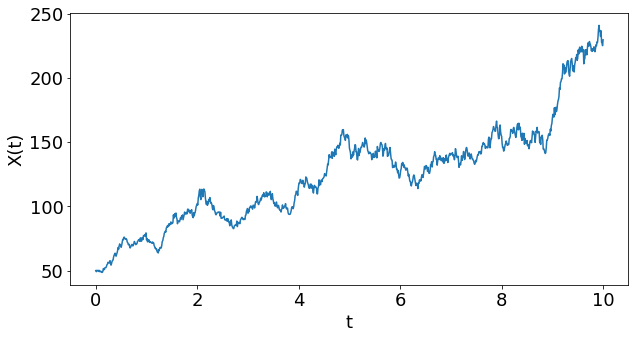

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# fix the seed of the random number generator
#np.random.seed(1)

T = 10.0
Steps = 1000
Sigma = 0.2
Mu = 0.1
InitialValue = 50.0
Interval = T / Steps
Sigma2 = Sigma * Sigma / 2

X = InitialValue
values = [X]
times = [0]

for j in range(0,Steps):
    Z = np.random.standard_normal(1)
    X = X * np.exp((Mu) * Interval + Sigma * np.sqrt(Interval) * Z)
    values.append(X) 
    times.append((j+1)*Interval)

plt.plot(times, values)
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams.update({'font.size': 18})
plt.xlabel('t')
plt.ylabel('X(t)')
plt.show()

In [4]:
## Asian Option Evaluation

In [18]:
def CI_95(data):
    a = np.array(data)
    n = len(a)
    m = np.mean(a)
    sd = np.std(a,ddof=1)
    hw = 1.96*sd / np.sqrt(n)
    return m, [m-hw,m+hw]

Maturity = 1.0
InterestRate = 0.05
Sigma = 0.3
InitialValue = 50.0
StrikePrice = 55.0
Steps = 64
Interval = Maturity / Steps
Sigma2 = Sigma * Sigma / 2

np.random.seed(1)
Replications = 10000

Interval = Maturity / Steps

ValueList = [] # List to keep the option value for each sample path

for i in range(0,Replications):
    Sum = 0.0
    X = InitialValue
    for j in range(0,Steps):
        Z = np.random.standard_normal(1)
        X = X * np.exp((InterestRate - Sigma2) * Interval +
                       Sigma * np.sqrt(Interval) * Z)
        Sum = Sum + X
    Value = np.exp(-InterestRate * Maturity) * max(Sum/Steps - StrikePrice, 0)
    ValueList.append(Value)    

print ("Mean and CI:", CI_95(ValueList))


Mean and CI: (2.115259847507645, [2.025363220086925, 2.2051564749283648])


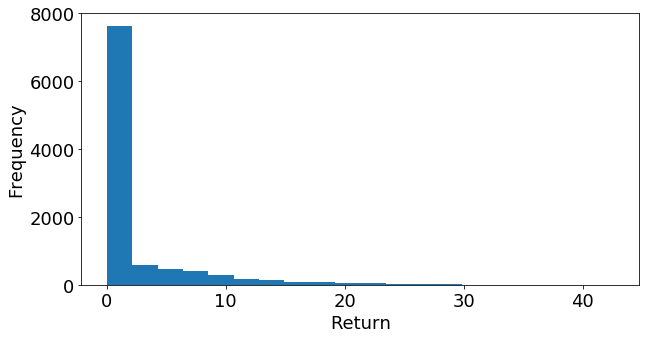

In [20]:
# plot a histogram of the option values across 1000 replications
plt.hist(ValueList, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams.update({'font.size': 18})
plt.show()

In [21]:
# Estimate the probability of zero return
ValueList.count(0) / float(len(ValueList))

0.684